# HW 4. Generative Models

Write the code to implement generative machine learning models.

In [3]:
from generative.GDA import *
from Data import load_spambase, shift_scale
from Testing import Wrapper, KFolds

## PB 1. Gaussian Descriminant Analysis

In [17]:
gda_shared = GDA(shared_covariance=True)
gda_single = GDA(shared_covariance=False, epsilon=0.1)

all_x, all_y = load_spambase()
normalized_x = shift_scale(all_x)
all_y = all_y.reshape((-1, 1))

Test the **shared covariance** GDA model with K-Folds accuracy:

In [18]:
wrapped_gda = Wrapper(gda_shared, gda_shared.fit, gda_shared.batch_accuracy)
kfolder = KFolds(wrapped_gda)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

Running k-folds, k=10
	- Iteration 1: testing error 0.8915401301518439
	- Iteration 2: testing error 0.8739130434782608
	- Iteration 3: testing error 0.8652173913043478
	- Iteration 4: testing error 0.8739130434782608
	- Iteration 5: testing error 0.8630434782608696
	- Iteration 6: testing error 0.8434782608695652
	- Iteration 7: testing error 0.841304347826087
	- Iteration 8: testing error 0.85
	- Iteration 9: testing error 0.8630434782608696
	- Iteration 10: testing error 0.8630434782608696
Average testing error across 10 folds: 0.8628496651890973


0.8628496651890973

Test the **unique covariance** GDA model with K-Folds accuracy:

In [19]:
wrapped_gda = Wrapper(gda_single, gda_single.fit, gda_single.batch_accuracy)
kfolder = KFolds(wrapped_gda)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

Running k-folds, k=10
	- Iteration 1: testing error 0.7917570498915402
	- Iteration 2: testing error 0.8391304347826087
	- Iteration 3: testing error 0.8152173913043478
	- Iteration 4: testing error 0.8130434782608695
	- Iteration 5: testing error 0.8260869565217391
	- Iteration 6: testing error 0.7956521739130434
	- Iteration 7: testing error 0.8173913043478261
	- Iteration 8: testing error 0.7760869565217391
	- Iteration 9: testing error 0.8239130434782609
	- Iteration 10: testing error 0.808695652173913
Average testing error across 10 folds: 0.8106974441195888


0.8106974441195888

## PB 2. Naive Bayes

In [1]:
from generative.NaiveBayes import *
from Data import load_spambase, shift_scale
from Testing import Wrapper, KFolds
from generative.View import BinaryEvaluator

def report_loss(nb):
    b = BinaryEvaluator(nb)
    print(b.confusion_matrix(all_x, all_y))
    b.show_roc(all_x, all_y)
    print(b.auc(all_x, all_y))

### Bernoulli Distributions

In [2]:
all_x, all_y = load_spambase()
normalized_x = shift_scale(all_x)
all_y = all_y.reshape((-1, 1))
nb = NaiveBayes(lambda: Bernoulli(laplace=False))

In [3]:
wrapped_nb = Wrapper(nb, nb.fit, nb.batch_accuracy)
kfolder = KFolds(wrapped_nb)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

Running k-folds, k=10
	- Iteration 1: testing error 0.9154013015184381
	- Iteration 2: testing error 0.8934782608695652
	- Iteration 3: testing error 0.9108695652173913
	- Iteration 4: testing error 0.9108695652173913
	- Iteration 5: testing error 0.9021739130434783
	- Iteration 6: testing error 0.8717391304347826
	- Iteration 7: testing error 0.8847826086956522
	- Iteration 8: testing error 0.8934782608695652
	- Iteration 9: testing error 0.8782608695652174
	- Iteration 10: testing error 0.8934782608695652
Average testing error across 10 folds: 0.8954531736301048


0.8954531736301048

          pos     neg
true   1672.0  2451.0
false   337.0   141.0


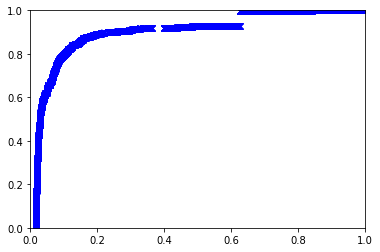

0.9016122599336478


In [4]:
report_loss(nb)

### Gaussian Distributions

In [2]:
all_x, all_y = load_spambase()
normalized_x = shift_scale(all_x)
all_y = all_y.reshape((-1, 1))
nb = NaiveBayes(lambda: UnivariateGaussian(epsilon=0.0001))

In [3]:
wrapped_nb = Wrapper(nb, nb.fit, nb.batch_accuracy)
kfolder = KFolds(wrapped_nb)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

Running k-folds, k=10
	- Iteration 1: testing error 0.7765726681127982
	- Iteration 2: testing error 0.8173913043478261
	- Iteration 3: testing error 0.782608695652174
	- Iteration 4: testing error 0.8152173913043478
	- Iteration 5: testing error 0.8021739130434783
	- Iteration 6: testing error 0.7608695652173914
	- Iteration 7: testing error 0.7934782608695652
	- Iteration 8: testing error 0.7543478260869565
	- Iteration 9: testing error 0.8065217391304348
	- Iteration 10: testing error 0.7673913043478261
Average testing error across 10 folds: 0.7876572668112798


0.7876572668112798

          pos     neg
true   1759.0  1867.0
false   921.0    54.0


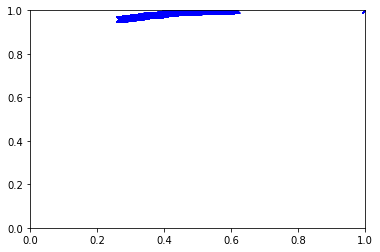

0.7299228194903579


In [4]:
report_loss(nb)

### Binning

With 4 bins, each of equal size.

In [ ]:
all_x, all_y = load_spambase()
normalized_x = shift_scale(all_x)
all_y = all_y.reshape((-1, 1))


left_mean = np.mean(all_x[:len(all_x)//2])
right_mean = np.mean(all_x[len(all_x)//2:])
mean = np.mean(all_x)
nb = NaiveBayes(lambda: Histograms(laplace=True, bins=[0, left_mean, mean, right_mean]))

In [ ]:
wrapped_nb = Wrapper(nb, nb.fit, nb.batch_accuracy)
kfolder = KFolds(wrapped_nb)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

With 9 bins, each having about an equal amount of data.

In [1]:
all_x, all_y = load_spambase()
normalized_x = shift_scale(all_x)
all_y = all_y.reshape((-1, 1))
nb = NaiveBayes(lambda: Histograms(9, laplace=True))

NameError: name 'load_spambase' is not defined

In [2]:
wrapped_nb = Wrapper(nb, nb.fit, nb.batch_accuracy)
kfolder = KFolds(wrapped_nb)
kfolder.testing_error(all_x, all_y, verbose=True, k = 10)

NameError: name 'Wrapper' is not defined

          pos     neg
true   1424.0  2667.0
false   121.0   389.0


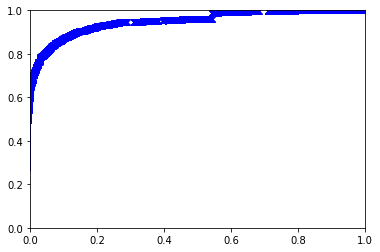

0.9572369488336038


In [31]:
report_loss(nb)

## EM Algorithm

In [1]:
from generative.EM import EM
from Data import load_2gaussian, load_3gaussian

two_g = load_2gaussian()
three_g = load_3gaussian()

### Two Gaussian Mixture

In [2]:
em = EM(n_gaussians=2)
em.fit(two_g,n_iter=20, verbose=True)

========== Parameters ==========
	Gaussian 0
weight: 0.6610331946247219
	 - mean: [7.02534338 3.99056762]
	 - covariance: [[0.96487349 0.48527705]
 [0.48527705 1.00061758]]
	Gaussian 1
weight: 0.3389668053752803
	 - mean: [3.01980432 3.04905691]
	 - covariance: [[1.06522553 0.02229947]
 [0.02229947 2.92807346]]


### Three Gaussian Mixture

In [3]:
em = EM(n_gaussians=3)
em.fit(three_g, n_iter=20, verbose=True)

========== Parameters ==========
	Gaussian 0
weight: 0.29237393946607565
	 - mean: [6.03519801 5.58399781]
	 - covariance: [[ 2.08806886 -1.01370123]
 [-1.01370123  3.28020706]]
	Gaussian 1
weight: 0.40117138691303
	 - mean: [5.85540389 6.02792405]
	 - covariance: [[ 1.68232539 -1.23758093]
 [-1.23758093  2.86890623]]
	Gaussian 2
weight: 0.30645467362089274
	 - mean: [3.56508203 4.06837062]
	 - covariance: [[1.59714276 0.9943405 ]
 [0.9943405  5.37065136]]
